In [9]:
from copy import deepcopy
from libemg.filtering import Filter
import numpy as np

from emgstatedetect.providers.biopatrec.biopatrec_classes import BioPatRecRecordingDataset
from emgstatedetect.providers.biopatrec.biopatrec_libemg_adapters.adapter_10mov4chFU_AFEs import Device, AnalogFrontEnd_UntargetedForearm
from emgstatedetect.visualizations.plots import plot_multisubject_multiclass_multichannel

In [10]:
def filter_data(odh, sampling_frequency):
  odh = deepcopy(odh)
  filter = Filter(sampling_frequency)
  filter.install_common_filters()
  filter.filter(odh)
  return odh

In [11]:
dataset = BioPatRecRecordingDataset('10mov4chFU_AFEs', '10mov4chFU_AFEs', persist_source=True)

TIADS1299_dataset = AnalogFrontEnd_UntargetedForearm(dataset_info=dataset.info, device=Device.ADS)

TIADS1299_data = TIADS1299_dataset.prepare_data()
TIADS1299_data = filter_data(TIADS1299_data, 2000)

2025-05-31 14:13:44 [INFO] biopatrec_classes.__init__: Initializing BioPatRecRecordingDataset for: 10mov4chFU_AFEs
2025-05-31 14:13:44 [INFO] biopatrec_classes.__init__: Local folder '10mov4chFU_AFEs' exists and contains mat files. Loading existing .mat files.


Local folder path: /workspaces/EMGStateDetect/10mov4chFU_AFEs
80 data files fetched out of 80 files.


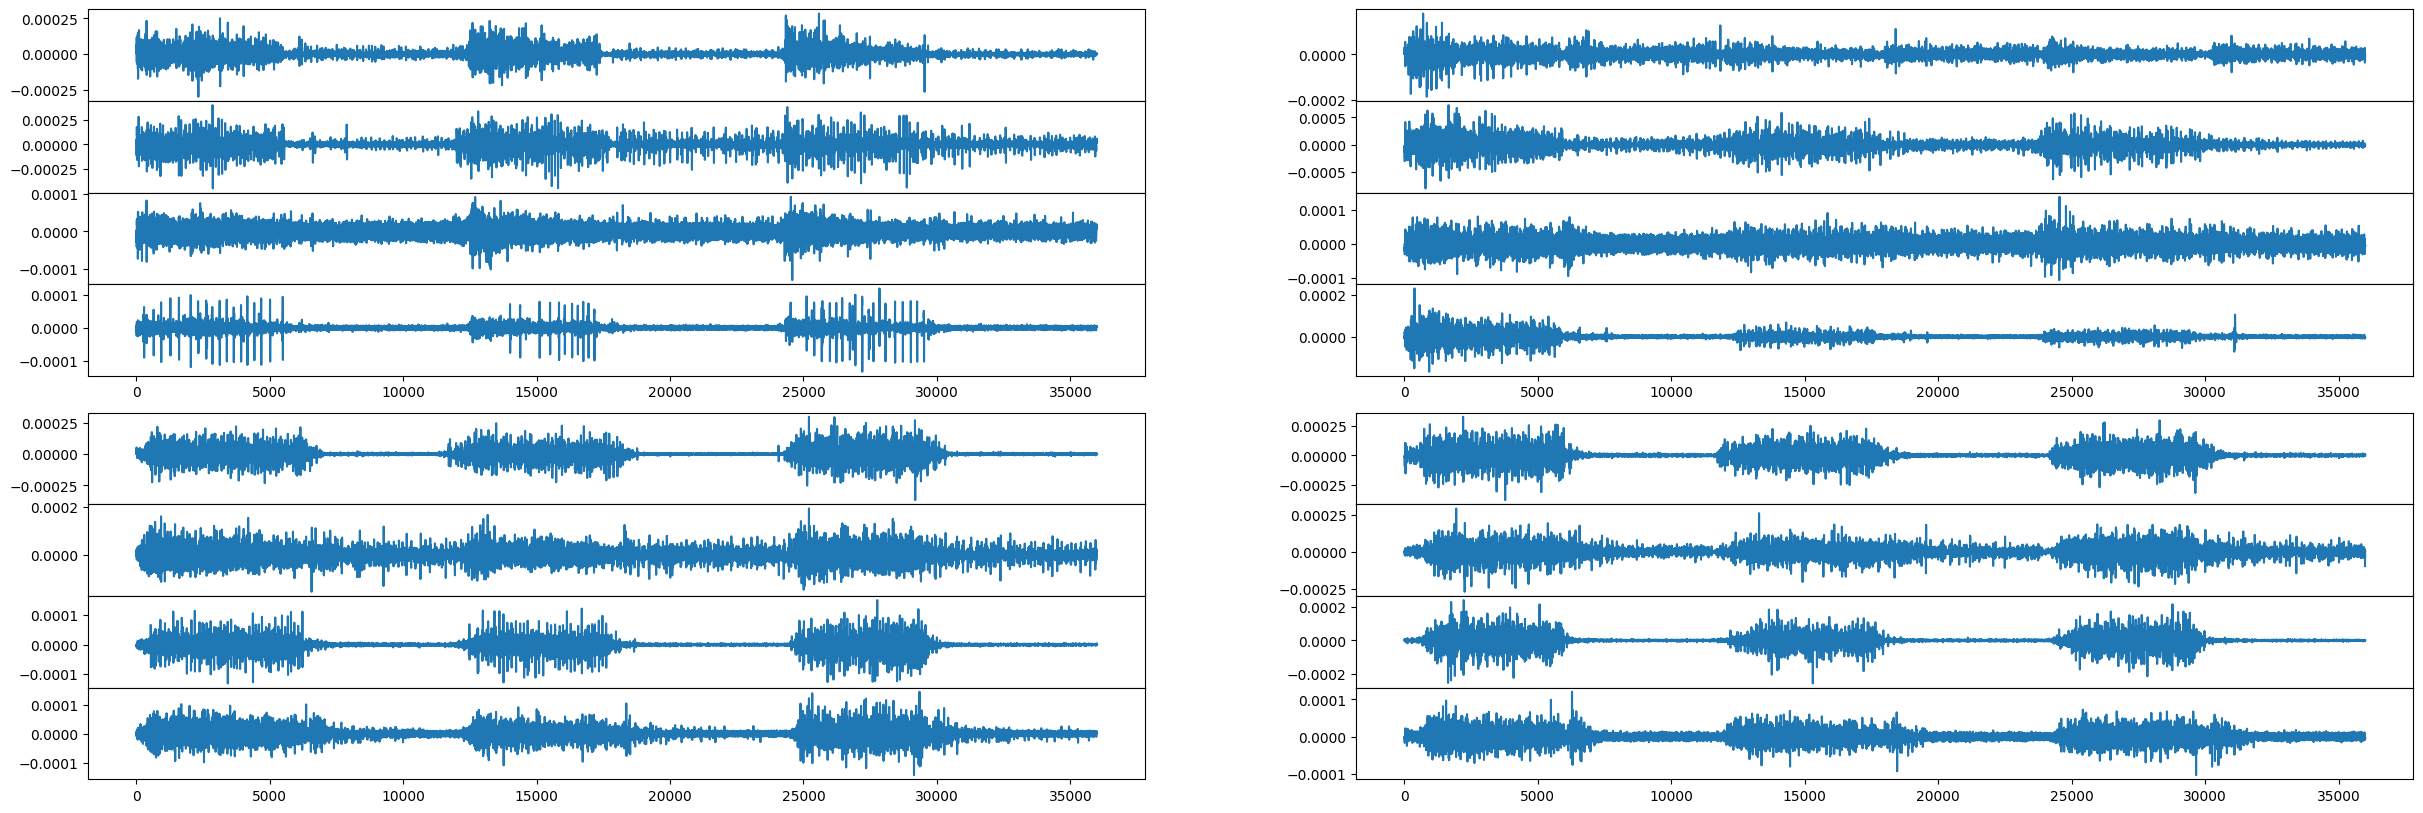

In [7]:
subjects_list = [TIADS1299_data.isolate_data("subjects", [subject_idx]) for subject_idx in range(2)]
classes_list = [sub_data.isolate_data("classes", [4,5]).data for sub_data in subjects_list]
a = np.swapaxes(np.array(classes_list), 2, 3)
fig = plot_multisubject_multiclass_multichannel(a)

In [15]:
odh = TIADS1299_data.isolate_data("subjects", [0,1])

window_samples_size = int(2000 * 0.25)
window_samples_step = int(2000 * 0.05)

windows, metadata = odh.parse_windows(window_samples_size, window_samples_step, metadata_operations=None)
print(windows.shape)

(7120, 4, 500)


In [20]:
print(metadata['subjects'].shape)
print(metadata['classes'].shape)

(7120,)
(7120,)


In [ ]:
# Tenemos 7120 windows
# cada windows tiene 500 muestras
# y 4 canales

print(windows.shape)

(7120, 4, 500)
